## Import all the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Set the plots style to dark grid and remove the pandas display limit.

In [2]:
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

## First, we list all the data, in order to acquire some general information about it.

In [3]:
df_cal = pd.read_csv('calendar.csv')
df_list = pd.read_csv('listings.csv')
df_rev = pd.read_csv('reviews.csv')

In [4]:
df_cal

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [5]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [6]:
df_rev

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [7]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


## Exploring the data in calendar.csv

In [8]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [9]:
df_cal.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [10]:
print(df_cal.listing_id.nunique())
print(df_cal.available.nunique())

3585
2


In [11]:
df_cal.isnull().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [12]:
df_cal.available.unique()

array(['f', 't'], dtype=object)

In [13]:
# price is null only when the host is booked
df_cal[df_cal.available == 't']

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00


In [14]:
# we check the unique prices in order to have a better grasp of how the price strings are
df_cal.price.unique()

array([nan, '$65.00', '$75.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

### Change price from string to float

In [15]:
def price_to_float(val):
    dols, cents = val.split('.')
    dols = dols.replace(',', '')
    dols = float(dols[1:])
    cents = float(cents) / 100
    return dols + cents
mask = df_cal.price.notnull()
df_cal.price[mask] = df_cal.price[mask].apply(price_to_float)

<ipython-input-15-4352b2827a2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal.price[mask] = df_cal.price[mask].apply(price_to_float)


# 1) What was the housestay that earned the most? Is it in the most expensive street?
---
Let's estimate the housestay earnings by multiplying the number of times it was booked by its price. First, let's obtain the number of times the listed places were booked.

In [16]:
df_most_rented = df_cal[df_cal.available == 'f']
df_most_rented = df_most_rented.groupby(by='listing_id').count()
df_most_rented = df_most_rented.reset_index()
df_most_rented = df_most_rented.rename(columns={'available': 'times_booked'})
df_most_rented = df_most_rented[['listing_id', 'times_booked']]
df_most_rented = df_most_rented.sort_values(by='times_booked', ascending=False)
df_most_rented

,listing_id,times_booked
2640,12898806,570
1741,8626752,365
2330,11624428,365
2313,11553697,365
2315,11569156,365
...,...,...
2530,12494334,1
3295,14584547,1
360,1755376,1
32,23668,1


Now, let's take the listed prices.

In [17]:
prices_df = df_list[['id', 'price']].copy()
prices_df.price = prices_df.price.apply(price_to_float)
prices_df = prices_df.rename(columns={'id': 'listing_id'})
earnings_df = pd.merge(left=prices_df, right=df_most_rented, how='inner', on='listing_id')
earnings_df['earnings'] = np.multiply(earnings_df.price.values,
                                      earnings_df.times_booked.values)
earnings_df = earnings_df.sort_values(by='earnings', ascending=False)
TOP_ID = earnings_df['listing_id'].values[0]
earnings_df

,listing_id,price,times_booked,earnings
2967,12679021,3000.0,365,1095000.0
773,6093430,1400.0,365,511000.0
2149,6451456,1372.0,365,500780.0
2385,12962229,1275.0,365,465375.0
3007,14291722,1250.0,333,416250.0
...,...,...,...,...
1637,7489883,60.0,1,60.0
2439,9953144,58.0,1,58.0
886,12796808,53.0,1,53.0
2466,13478868,42.0,1,42.0


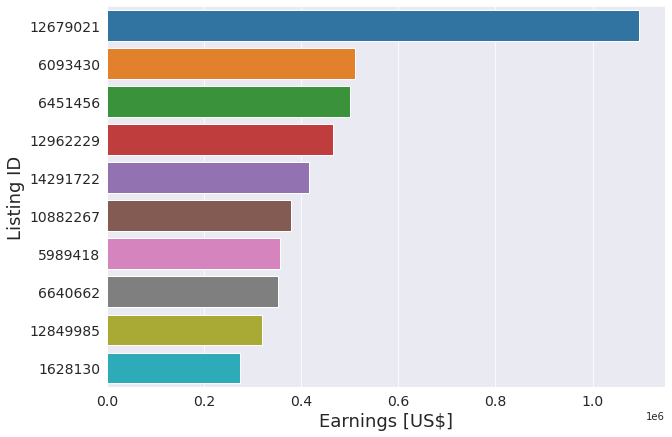

In [18]:
plt.figure(figsize=(10,7))
sns.barplot(y='listing_id', x='earnings',
            data=earnings_df.iloc[:10], orient='h',
            order=earnings_df.listing_id[:10])
plt.xlabel('Earnings [US$]', fontdict={'size': 18})
plt.ylabel('Listing ID', fontdict={'size': 18})
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

## Dropping columns from `df_cal` that are useless for the analysis

In [19]:
d_columns = [i for i in df_list.columns if re.search('_url', i)]
d_columns += ['scrape_id', 'last_scraped', 'country', 'latitude',
              'longitude', 'calendar_updated', 'calendar_last_scraped']
df_list2 = df_list.drop(columns=d_columns)
df_list2.price = df_list2.price.apply(price_to_float)
df_list2.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,65.0,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,NaN,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",16701,Phil,2009-05-11,"Boston, Massachusetts, United States","I am a middle-aged, single male with a wide ra...",within a few hours,100%,88%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,"Ardale St., Boston, MA 02131, 

Listing for the housestay that earned the most.

In [20]:
df_list2[df_list2.id == TOP_ID]

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3055,12679021,View of IndyCar...ON THE STREET!,"Look out the window, use the common space, wha...",NaN,"Look out the window, use the common space, wha...",none,NaN,NaN,NaN,NaN,NaN,NaN,38001139,Robert,2015-07-09,"Boston, Massachusetts, United States",NaN,NaN,NaN,NaN,f,South Boston,1,1,"['email', 'phone', 'facebook']",t,f,"Congress Street, Boston, MA 02210, United States",South Boston,South Boston Waterfront,NaN,Boston,MA,02210,Boston,"Boston, MA",US,t,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,3000.0,NaN,NaN,NaN,NaN,1,$0.00,1,1125,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [21]:
df_list2[df_list2.id == earnings_df.listing_id.values[0]][['price', 'neighbourhood', 'street']]

,price,neighbourhood,street
3055,3000.0,South Boston,"Congress Street, Boston, MA 02210, United States"


Housestay reviews
----

There are no reviews for this housestay, which is weird.

In [22]:
df_rev[df_rev.id == TOP_ID]

,listing_id,id,date,reviewer_id,reviewer_name,comments


Let's check how many times this place was rented. It seems the place was rented for the most part of the year, 336 days. It is really weird there are no reviews for it. Good reviews for such a successful place would be expected.

In [23]:
aux = df_cal[df_cal.listing_id == TOP_ID]
aux = aux[aux.available == 'f']
aux.count()

listing_id    365
date          365
available     365
price           0
dtype: int64

## Finding the most expensive neighbourhoods
---
We consider the most expensive areas to be the ones with the highest average price.

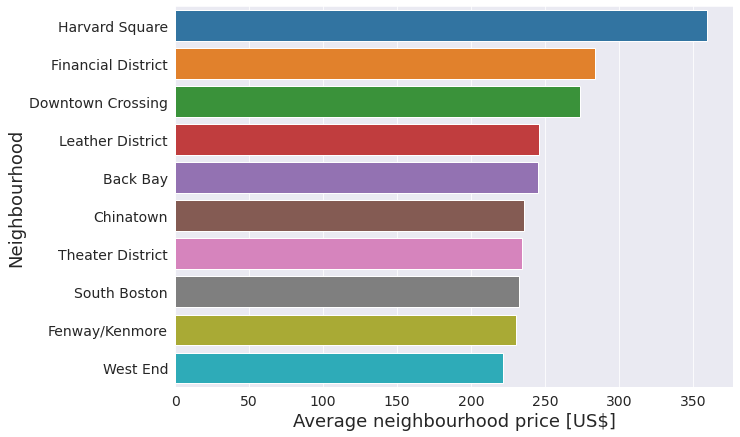

In [24]:
df_hood = df_list2.groupby(by='neighbourhood').mean()
df_hood = df_hood.reset_index()
df_hood = df_hood.sort_values(by='price', ascending=False)
# df_hood[['neighbourhood', 'price']].iloc[:20]

plt.figure(figsize=(10,7))
sns.barplot(y='neighbourhood', x='price',
            data=df_hood.iloc[:10], orient='h')
plt.xlabel('Average neighbourhood price [US$]', fontdict={'size': 18})
plt.ylabel('Neighbourhood', fontdict={'size': 18})
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

We conclude the most rentable housestay is in the top 10 most expensive neighbourhoods (9th) .

## Finding the most expensive streets

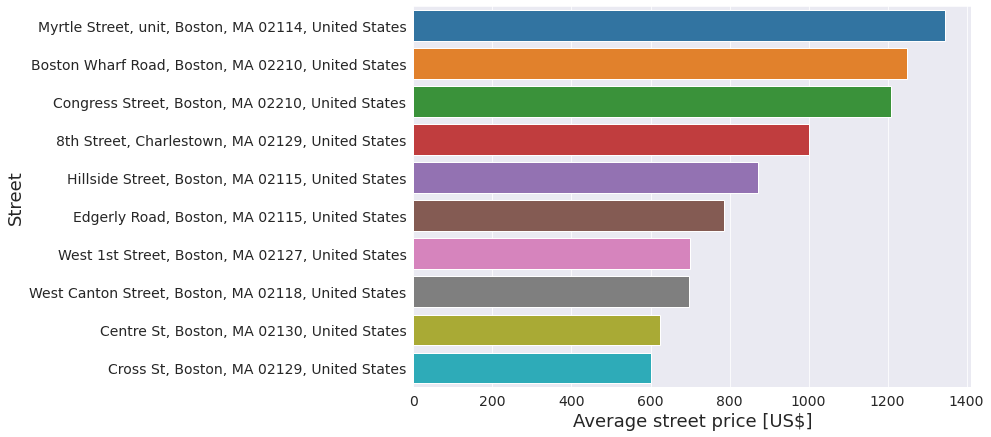

In [25]:
df_hood = df_list2.groupby(by='street').mean()
df_hood = df_hood.reset_index()
df_hood = df_hood.sort_values(by='price', ascending=False)
df_hood[['street', 'price']].iloc[:10]

plt.figure(figsize=(10,7))
sns.barplot(y='street', x='price',
            data=df_hood.iloc[:10], orient='h')
plt.xlabel('Average street price [US$]', fontdict={'size': 18})
plt.ylabel('Street', fontdict={'size': 18})
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

We conclude the most rentable housestay is in the top 10 most expensive streets (3rd) .

# 2) What are the busiest times of the year to visit Seattle? By how much do prices spike?
---
First, we need to convert the dates from `str` to `datetime`.

In [26]:
df_cal2 = df_cal.copy()
df_cal2.date = pd.to_datetime(df_cal2.date)

Now, we create a column with only the months.

In [27]:
df_cal2['month'] = df_cal2.date.apply(lambda x: x.month)
df_cal2

,listing_id,date,available,price,month
0,12147973,2017-09-05,f,NaN,9
1,12147973,2017-09-04,f,NaN,9
2,12147973,2017-09-03,f,NaN,9
3,12147973,2017-09-02,f,NaN,9
4,12147973,2017-09-01,f,NaN,9
...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,9
1308886,14504422,2016-09-09,f,NaN,9
1308887,14504422,2016-09-08,f,NaN,9
1308888,14504422,2016-09-07,f,NaN,9


Split available and non-available homestays.

In [28]:
mask.values.sum()

643037

In [59]:
df_cal2f = df_cal2[df_cal2.price.isnull()]
df_cal2f.head()

,listing_id,date,available,price,month
0,12147973,2017-09-05,f,NaN,9
1,12147973,2017-09-04,f,NaN,9
2,12147973,2017-09-03,f,NaN,9
3,12147973,2017-09-02,f,NaN,9
4,12147973,2017-09-01,f,NaN,9


Count how many places are rented, in order to see the renting trend.

In [63]:
df_cal3 = df_cal2.dropna()[['month', 'price']]
df_cal3.price = df_cal3.price.astype(float)
df_cal3 = df_cal3.groupby(by='month').mean()
df_cal3 = df_cal3.dropna()
df_cal3 = df_cal3.reset_index()
df_cal3.head()

,month,price
0,1,182.799671
1,2,180.961028
2,3,181.818742
3,4,197.252890
4,5,193.712295


In [65]:
df_cal3f = df_cal2f[['month', 'date']].groupby(by='month').count()
df_cal3f = df_cal3f.rename(columns={'date': 'count'})
df_cal3f = df_cal3f.reset_index()
df_cal3f.head()

,month,count
0,1,47985
1,2,43598
2,3,55985
3,4,56198
4,5,57566


Get the average prices for each month, from the vacant homestays, since the rented ones do not present their prices.

In [66]:
def nice_lineplot(x_label, y_label, *kargs, **kwargs):
    plt.figure()
    plt.xlabel(x_label, fontdict={'size': 18})
    plt.ylabel(y_label, fontdict={'size': 18})
    plt.xticks(size=14)
    plt.yticks(size=14)
    sns.lineplot(*kargs, **kwargs)
    plt.show()

In [85]:
prices_spike = df_cal4.price.max() - df_cal4.price.min()
prices_spike_pct = (df_cal4.price.max() - df_cal4.price.min()) / df_cal4.price.min() * 100
reserves_spike = df_cal3f['count'].max() - df_cal3f['count'].min()
reserves_spike_pct = (df_cal3f['count'].max() - df_cal3f['count'].min()) / df_cal3f['count'].min() * 100
prices_spike_avg = df_cal4.price.max() - df_cal4.price.mean()
prices_spike_avg_pct = (df_cal4.price.max() - df_cal4.price.mean()) / df_cal4.price.mean() * 100
reserves_spike_avg = df_cal3f['count'].max() - df_cal3f['count'].mean()
reserves_spike_avg_pct = (df_cal3f['count'].max() - df_cal3f['count'].mean()) / df_cal3f['count'].mean() * 100
print(f'Prices spike - Min: US${prices_spike:.2f}, {prices_spike_pct:.2f}%.')
print(f'Prices spike - Avg: US${prices_spike_avg:.2f}, {prices_spike_avg_pct:.2f}%.')
print(f'Reserves spike - Min: {reserves_spike} reservations, {reserves_spike_pct:.2f}%.')
print(f'Reserves spike - Avg: {reserves_spike_avg} reservations, {reserves_spike_avg_pct:.2f}%.')

Prices spike - Min: US$56.09, 30.99%.
Prices spike - Avg: US$36.64, 18.28%.
Reserves spike - Min: 30584 reservations, 70.15%.
Reserves spike - Avg: 18694.25 reservations, 33.69%.


Lets plot the prices and number of listings over the months, so we may have a better understanding of the trends.

In the first plot, we see the prices spike around during September and October (months 9 and 10), and drop from January till March. When comparing to the low season, the prices and reservations spike by 31% and 70%, respectively. In comparison with the average measurements, in the high season, the prices and reservations spike by 18% and 34%, respectively.

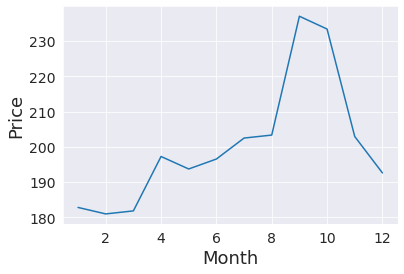

In [86]:
nice_lineplot(x_label='Month', y_label='Price', data=df_cal4,
              x='month', y='price')

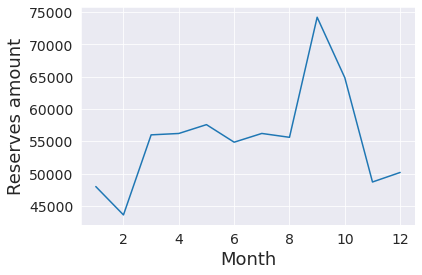

In [87]:
nice_lineplot(x_label='Month', y_label='Reserves amount', data=df_cal3f,
              x='month', y='count')